# PREDICTING CAR PRICES

IN THIS PROJECT WE WILL PREDICT CAR PRICES BY K-NEAREST NEIGHBOR OR KNN ALRGORITHM USING AUTOMOBILE DATASET FROM UCI MACHINE LEARNING REPOSOTORY.

- EXPLORING THE FUNDAMENTALS OF MACHINE LEARNING USING THE K_NEAREST NEIGHBORS ALOGORITHM

- PRACTICING THE MACHINE LEARNING WORKFLOW TO PREDICT CAR'S MARTKET PRICE USING ITS ATTRIBUTES.

- THE DATASET WE WILL BE WORKING WITH CONTAINS INFORMATION ON VARIOUS CARS.

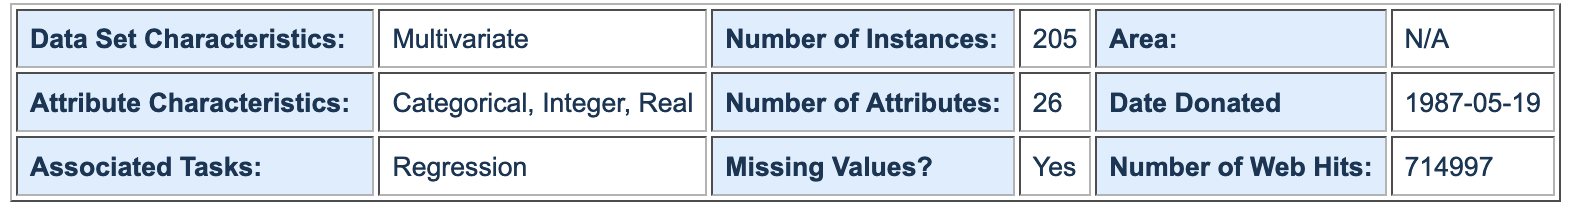

#### Source:

#### Creator/Donor:

Jeffrey C. Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu)

#### Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.

2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038

3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

## DATASET AND DESCRIPTION

### Data Set Information:

This data set consists of three types of entities: 

(a) the specification of an auto in terms of various characteristics, 

(b) its assigned insurance risk rating, 

(c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

### Attribute Information:

#### Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.

2. normalized-losses: continuous from 65 to 256.

3. make:
    - alfa-romero
    
    - audi, bmw 
    
    - chevrolet
    
    - dodge
    
    - honda

    - isuzu
    
    - jaguar
    
    - mazda
    
    - mercedes-benz
    
    - mercury
    
    - mitsubishi 
    
    - nissan
    
    - peugot
    
    - plymouth
    
    - porsche

    - renault
    
    - saab
    
    - subaru
    
    - toyota
    
    - volkswagen
    
    - volvo

4. fuel-type: diesel, gas.

5. aspiration: std, turbo.

6. num-of-doors: four, two.

7. body-style: hardtop, wagon, sedan, hatchback, convertible.

8. drive-wheels: 4wd, fwd, rwd.

9. engine-location: front, rear.

10. wheel-base: continuous from 86.6 120.9.

11. length: continuous from 141.1 to 208.1.

12. width: continuous from 60.3 to 72.3.

13. height: continuous from 47.8 to 59.8.

14. curb-weight: continuous from 1488 to 4066.

15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.

16. num-of-cylinders: eight, five, four, six, three, twelve, two.

17. engine-size: continuous from 61 to 326.

18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.

19. bore: continuous from 2.54 to 3.94.

20. stroke: continuous from 2.07 to 4.17.

21. compression-ratio: continuous from 7 to 23.

22. horsepower: continuous from 48 to 288.

23. peak-rpm: continuous from 4150 to 6600.

24. city-mpg: continuous from 13 to 49.

25. highway-mpg: continuous from 16 to 54.

26. price: continuous from 5118 to 45400.

Dataset:
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/

Data description:
https://archive.ics.uci.edu/ml/datasets/automobile

### IMPORT IMPORTANT LIBRARIES 

In [1]:
import pandas as pd
pd.options.display.max_columns = 99

import numpy as np

import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

from pylab import rcParams
rcParams['figure.figsize'] = 7,7 

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

from heatmap import heatmap, corrplot

### READ DATA TO DATAFRAME

In [2]:
# Define column name for each attributes 
columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
           'num_doors', 'body_style', 'drive_wheels', 'engine_location',
          'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine-type',  
           'num-of-cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 
           'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
   
# Read data by pandas read_csv function and assign columns name
# Display dataset
cars = pd.read_csv('imports-85.data', names=columns)
cars

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine-type,num-of-cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
# Inspect data and data type
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine_size        205 non

In [4]:
# Check missing values again
cars.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine-type          0
num-of-cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

## DATA PREPARATION

### FEATURES SELECTION AND CLEANING DATASET

In [5]:
# Find the numeric column and can be used as features and target column
numeric_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
                'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'city_mpg',
                'highway_mpg', 'price']

# Assign numeric and target column to new dataframe 
cars_df = cars[numeric_cols]

# Display the first few rows of dataframe
cars_df.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,18,22,17450


We will select only column that is numeric data to use those columns as features for training our model. and drop any columns that we don't want to use it.

In [6]:
# Inspect data in new dataframe
print("Make sure our new dataframe dont have missing values and check the details: ")
print("\n")
print(cars_df.info())

Make sure our new dataframe dont have missing values and check the details: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  205 non-null    object 
 1   wheel_base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb_weight        205 non-null    int64  
 6   engine_size        205 non-null    int64  
 7   bore               205 non-null    object 
 8   stroke             205 non-null    object 
 9   compression_ratio  205 non-null    float64
 10  horsepower         205 non-null    object 
 11  city_mpg           205 non-null    int64  
 12  highway_mpg        205 non-null    int64  
 13  price              205 non-null    object 
dtypes: float64(5), int64(4), object(5)
memory u

But if look back to the dataframe again in normalized_losses column and found that column contains missing values represented using "?".

Need to cleaning this column with some method.

In [7]:
# Example for missing values in normalized_losses column
cars_df.head(2)

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,21,27,16500


In [8]:
# Replace missing values with NaN values
cars_df = cars_df.replace("?", np.nan)

# Make sure our data has changed
cars_df.head(2)

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,21,27,16500


In [9]:
# Check missing values
print(cars_df.isna().sum())

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64


After replace missing values "?" then some missing values occured from other columns also.

And price column also has missing values but this column is the target column. So let's drop any rows with missing value in price column instead.

In [10]:
# Drop any rows that have missing values in price column
cars_df = cars_df.dropna(subset=['price'])

# Change data type to float before cleaning again
cars_df = cars_df.astype(float)

# Confirm all column change to float
display(cars_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  164 non-null    float64
 1   wheel_base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb_weight        201 non-null    float64
 6   engine_size        201 non-null    float64
 7   bore               197 non-null    float64
 8   stroke             197 non-null    float64
 9   compression_ratio  201 non-null    float64
 10  horsepower         199 non-null    float64
 11  city_mpg           201 non-null    float64
 12  highway_mpg        201 non-null    float64
 13  price              201 non-null    float64
dtypes: float64(14)
memory usage: 23.6 KB


None

Still found missing values in those column. Try to fill out it with other method.

In [11]:
# fill all miss values with mean from each column
cars_df = cars_df.fillna(cars_df.mean())

In [12]:
# Confirm that don't have any missing values in this data
cars_df.isna().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

We decided to fill every Nan data with average values from each columns.

### NORMALIZATION 

In [13]:
# Collect price column to price variable
price_col = cars_df['price'].copy()

# Normalize all column in dataframe
cars_df = (cars_df - cars_df.min()) / (cars_df.max() - cars_df.min()) 

# Assign price column back to dataframe
cars_df['price'] = price_col

# Display dataframe after normalized
cars_df.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.138889,0.157895,17450.0


Normalize data in dataframe except price column in range of 0 to 1

### VISUALIZATION DATA WITH CORRELATION

In [14]:
# Calculate the correlation between data in dataframe and display as below
cars_corr = cars_df.corr()
cars_corr

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,city_mpg,highway_mpg,price
normalized_losses,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,-0.225016,-0.181877,0.133999
wheel_base,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371250,-0.470606,-0.543304,0.584642
length,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579731,-0.665192,-0.698142,0.690628
width,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.615006,-0.633531,-0.680635,0.751265
height,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086941,-0.049800,-0.104812,0.135486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
compression_ratio,-0.114713,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001250,0.187854,1.000000,-0.214431,0.331425,0.268465,0.071107
horsepower,0.217300,0.371250,0.579731,0.615006,-0.086941,0.757994,0.822649,0.566838,0.097815,-0.214431,1.000000,-0.822138,-0.804587,0.809681
city_mpg,-0.225016,-0.470606,-0.665192,-0.633531,-0.049800,-0.749543,-0.650546,-0.582121,-0.034079,0.331425,-0.822138,1.000000,0.972044,-0.686571
highway_mpg,-0.181877,-0.543304,-0.698142,-0.680635,-0.104812,-0.794889,-0.679571,-0.591390,-0.034741,0.268465,-0.804587,0.972044,1.000000,-0.704692


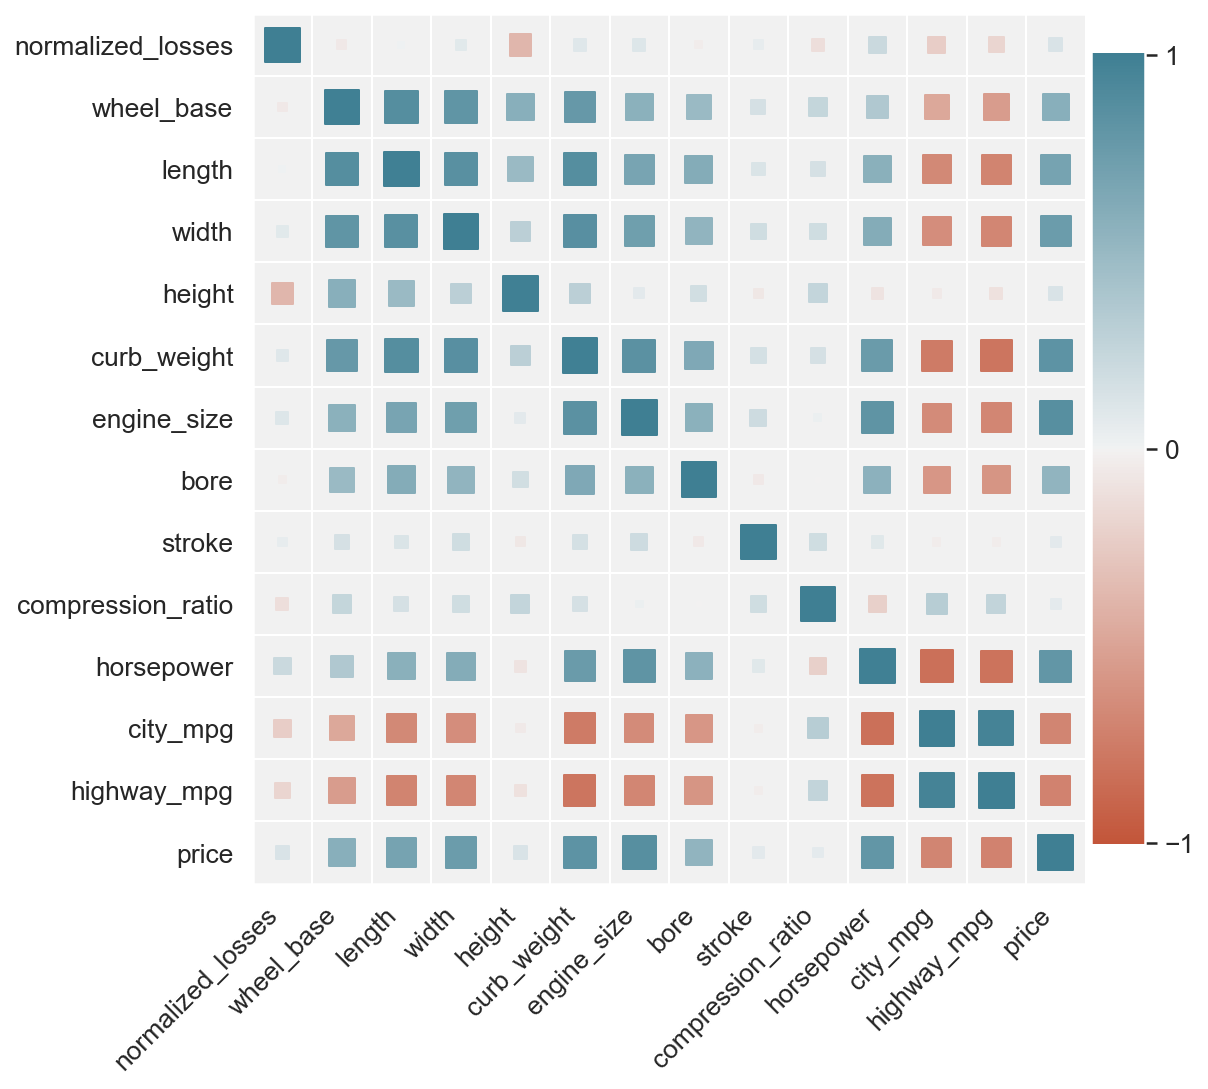

In [15]:
# Plot the correlation matrix
plt.figure(figsize=(8, 8))
corrplot(cars_df.corr(), size_scale=300);

Plot Correlation Matrix to inspect each feature in our dataframe that we selected in a few previous cells have some how relation between each others.

## MODEL

### IMPORT LABRARIES FOR THE MODEL

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### CREATE FUNCTION FOR GET INPUT, TRAINING, PREDICTION AND RETURN RMSE 

#### Univariate model  

#### CREATE FUNCTION FOR UNIVARIATE MODEL

In [17]:
def knn_train_test(train_col, target_col, df):
    model = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of row in dataframe by shuffle index
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    # Train test split
    # Holdout validation
    haft_row = int(len(rand_df) / 2)
    
    # Train set
    train_df = rand_df[:haft_row]
    
    # Test set
    test_df = rand_df[haft_row:]
    
    # Start training
    model.fit(train_df[[train_col]], train_df[[target_col]])
    
    # Model prediction
    predicted_labels = model.predict(test_df[[train_col]])
    
    # Calculate mse and return rmse
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    
    return rmse

- Use KNN model with default K values(default=5) in this function.

- Randomize order of row in dataframe by shuffle index to avoid bias from the data.

- Split train and test data by Holdout validation method.

- Calculate MSE , RMSE to evaluation model.

- Use function knn_train_test to learn in train dataset and predict price in test dat-aset.

In [18]:
# Drop price column and assign to variable for training
train_cols = cars_df.copy().columns.drop('price')

# Create empty dict for collect rmse from the model
rmse_values = {}

# For loop using the model 
for col in train_cols:
    rmse = knn_train_test(col, 'price', cars_df)
    rmse_values[col] = rmse

In [19]:
# Create pandas series for make easier to check rmse values from model predicted
rmse_results_k5 = pd.Series(rmse_values)

# Sort rmse results from ascending
rmse_sorted_k5 = rmse_results_k5.sort_values()

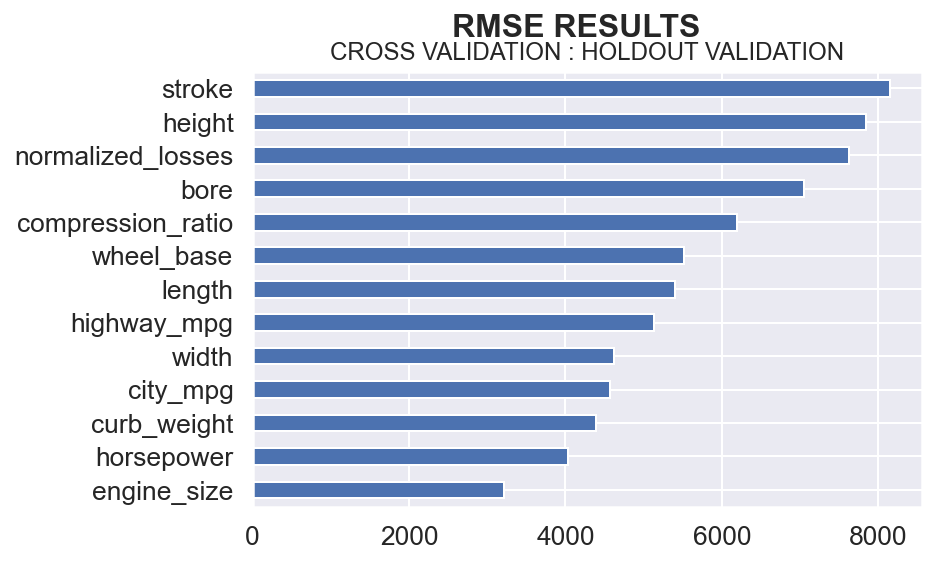

In [20]:
# Use pandas series and plot as bar horizon plot
rmse_sorted_k5.plot.barh()
plt.suptitle('RMSE RESULTS', weight='bold', fontsize=16)
plt.title('CROSS VALIDATION : HOLDOUT VALIDATION', fontsize=12)
plt.show()

#### CREATE NEW FUNCTION FOR UNIVARIATE MODEL WITH K VALUES

In [21]:
def knn_train_test_k(train_col, target_col, df):
    np.random.seed(1)
    
    # Randomize order of row in dataframe by shuffle index
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    # Train test split
    haft_row = int(len(rand_df) / 2)
    
    # Train set
    train_df = rand_df[:haft_row]
    
    # Test set
    test_df = rand_df[haft_row:]
    
    # Define K values
    k_values = [1, 3, 5, 7, 9]
    
    # Create dictionary for collect the rmse values from the model
    k_rmse = {}
    
    # Start training
    for k in k_values:
        model = KNeighborsRegressor(n_neighbors=k)
        
        # Training 
        model.fit(train_df[[train_col]], train_df[[target_col]])
    
        # Model prediction
        predicted_labels = model.predict(test_df[[train_col]])
    
        # Calculate mse and return rmse
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmse[k] = rmse
        
    
    return k_rmse

NOTE : Change function using for loop to change the K values

In [22]:
# Create train columns by drop price column
train_col = cars_df.columns.drop('price')

# Create dictionary for collect results from the model
rmse_results = {}

for col in train_col:
    rmse_val = knn_train_test_k(col, 'price', cars_df)
    rmse_results[col] = rmse_val
    
rmse_results

{'normalized_losses': {1: 9169.343202344224,
  3: 6880.446272095314,
  5: 7625.4735831635235,
  7: 7473.664789346109,
  9: 7738.876108695796},
 'wheel_base': {1: 4855.5992594443815,
  3: 5184.378495648115,
  5: 5515.846252604965,
  7: 5477.656799317875,
  9: 5782.551803928287},
 'length': {1: 5647.675258173241,
  3: 5328.247336279319,
  5: 5404.45662309275,
  7: 5436.492374560482,
  9: 5379.091143788758},
 'width': {1: 4661.521707947241,
  3: 4614.760371701744,
  5: 4616.727651091889,
  7: 4601.566039816409,
  9: 4646.370571277915},
 'height': {1: 12172.675286627149,
  3: 8658.387014639016,
  5: 7846.702837788268,
  7: 7702.912254324187,
  9: 7775.771673730523},
 'curb_weight': {1: 5520.99749830025,
  3: 5038.26321442437,
  5: 4390.831218314223,
  7: 4369.389287209419,
  9: 4631.017219623442},
 'engine_size': {1: 3793.0524594837916,
  3: 2888.101089122418,
  5: 3217.672060098206,
  7: 3581.324289617956,
  9: 3786.6109385990276},
 'bore': {1: 6936.672777904604,
  3: 7268.13343244737,
  

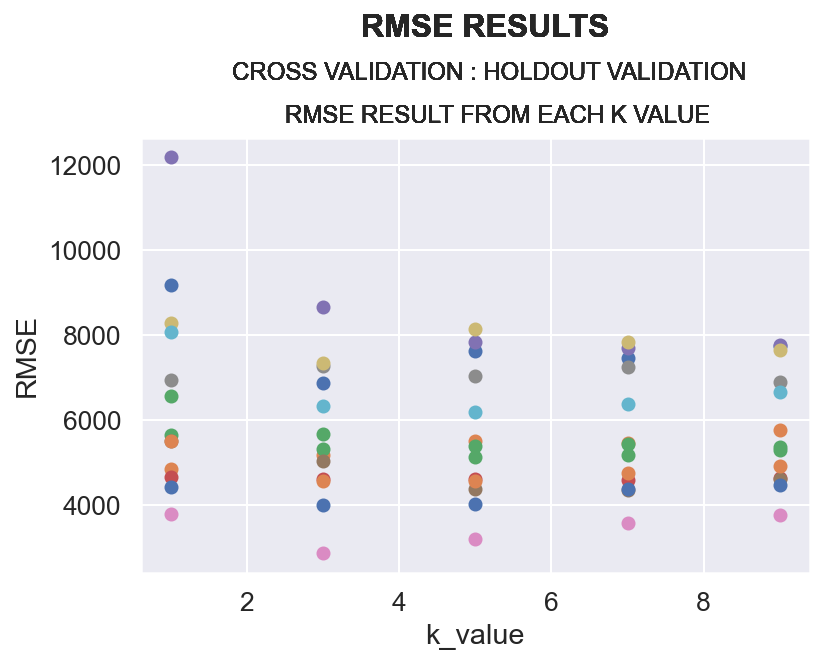

In [23]:
# Plot rmse results from the model with each k values
for k,v in rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.text(x=3.5, y=15000, s='RMSE RESULTS', weight='bold', size=16)
    plt.text(x=1.8, y=14000, s='CROSS VALIDATION : HOLDOUT VALIDATION', size=12)
    plt.text(x=2.5, y=13000, s='RMSE RESULT FROM EACH K VALUE', size=12)
    plt.xlabel('k_value')
    plt.ylabel('RMSE')

plt.show()

After training the model with the default model and custom model with we got the best top features that we might need to experiment with others way. 

But as the scatter plot above the result seems difficult to describe and inspect the performance of the model.

So we can find the average from each result K values in each feature. This way should be better for describing and inspecting the results.

In [24]:
# Change rmse result to dataframe
rmse_df = pd.DataFrame(rmse_results)

# Calculate average for rmse by feature
rmse_df = rmse_df.mean()

# Sort rmse scores by ascending and reset index
rmse_df_sorted = rmse_df.sort_values(ascending=True).reset_index()

# Change columns name and display dataframe
rmse_df_sorted.rename(columns={0: 'RMSE', 'index': 'FEATURE'}, inplace=True)
rmse_df_sorted

,FEATURE,RMSE
0,engine_size,3453.352167
1,horsepower,4274.632899
2,width,4628.189268
3,curb_weight,4790.099688
4,city_mpg,4872.297020
...,...,...
8,compression_ratio,6731.061415
9,bore,7082.379556
10,normalized_losses,7777.560791
11,stroke,7858.027846


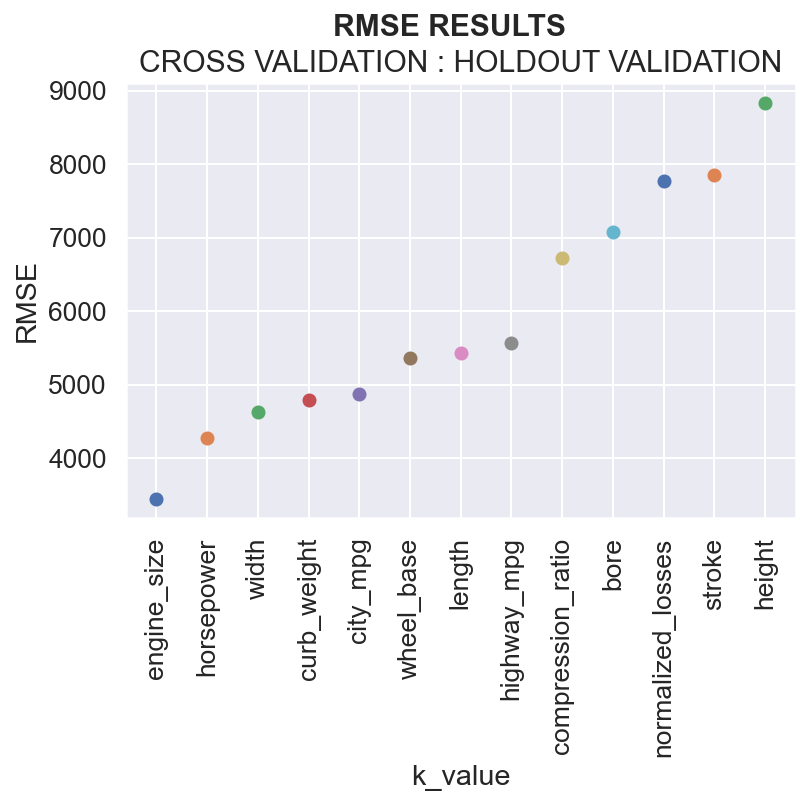

In [25]:
# Plot rmse results from the model with each average k values
for idx, col in rmse_df_sorted.iterrows():
    x = col['FEATURE']
    y = col['RMSE']
    
    plt.scatter(x,y)
    plt.suptitle('RMSE RESULTS', weight='bold', size=15, y=1)
    plt.title('CROSS VALIDATION : HOLDOUT VALIDATION', size=15)
    plt.xlabel('k_value')
    plt.xticks(rotation=90)
    plt.ylabel('RMSE')

plt.show()

### CONCLUSION 

- After efforted with Univariate model with holdout validation between K = 5 and K = [1, 3, 5, 7, 9] 
   
    - Univariate model with holdout validation | K = 5

        - Best RMSE result from first model as below:
        
            - engine_size
            
            - horsepower
            
            - curb_weight
            
            - city_mpg
            
            - width
            
    - Univariate model with holdout validation | K = [1, 3, 5, 7, 9]
    
        - Best RMSE result from second model as below:
        
            - engine_size
            
            - horsepower
            
            - width 
            
            - curb_weight
            
            - city_mpg
            
- The result from our two models we got 2 best features that are the same 'engine_size' & 'horsepower'

- But for last best three features still are the same but not respectively.

#### NEXT WE WILL TRY TO TRAIN MULTIVARIATE MODEL WITH TOP 5 FEATURES WE GOT FROM UNIVARIATE MODEL

### MULTIVARIATE MODEL

#### CREATE NEW FUNCTION FOR MULTIVARIATE MODEL

In [37]:
def knn_train_test_multi(train_col, target_col, df):
    np.random.seed(1)
    
    # Randomize order of row in dataframe by shuffle index
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    # Train test split
    haft_row = int(len(rand_df) / 2)
    
    # Train set
    train_df = rand_df[:haft_row]
    
    # Test set
    test_df = rand_df[haft_row:]
    
    # Define K values
    k_values = [5]
    
    # Create dictionary for collect the rmse values from the model
    k_rmse = {}
    
    # Start training
    for k in k_values:
        model = KNeighborsRegressor(n_neighbors=k)
        
        # Training 
        model.fit(train_df[train_col], train_df[target_col])
    
        # Model prediction
        predicted_labels = model.predict(test_df[train_col])
    
        # Calculate mse and return rmse
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmse[f"K : {k}"] = rmse
        
    
    return k_rmse

NOTE : Change function to get the list of dataframe instead of only using single columns

#### CREATE TOP 5 BEST FEATURES

In [38]:
# Create top 5 best features with rmse result from previous model.
best_features = rmse_df_sorted[:5]['FEATURE']
best_features

0    engine_size
1     horsepower
2          width
3    curb_weight
4       city_mpg
Name: FEATURE, dtype: object

In [40]:
rmse_result_multi = {}

for best_ft in range(2, 7):
    rmse_result_multi[f'BEST FEATURES {best_ft}'] = knn_train_test_multi(
    best_features[:best_ft],
    'price',
    cars_df
    )
    
rmse_result_multi

{'BEST FEATURES 2': {'K : 5': 2950.385134450104},
 'BEST FEATURES 3': {'K : 5': 3554.861324278556},
 'BEST FEATURES 4': {'K : 5': 3487.340917327035},
 'BEST FEATURES 5': {'K : 5': 3360.832156381264},
 'BEST FEATURES 6': {'K : 5': 3360.832156381264}}

In [ ]:
multi5 = pd.DataFrame(rmse_result_multi)
multi5

As we see as above if we trained KNN multivariate model with top 5 features while K = 5(default one) we got lowest rmse result from top best 2 features with K = 5

Let's try with hyperparameter tuning the model to improve it.

## HYPERPARAMETER TUNING

#### CREATE NEW FUNCTION FOR MULTIVARIATE MODEL WITH TOP 5 FEATURES AND TUNING HYPERPARAMETER

In [ ]:
def knn_train_test_multi_tune(train_col, target_col, df):
    np.random.seed(1)
    
    # Randomize order of row in dataframe by shuffle index
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    # Train test split
    haft_row = int(len(rand_df) / 2)
    
    # Train set
    train_df = rand_df[:haft_row]
    
    # Test set
    test_df = rand_df[haft_row:]
    
    # Define K values
    k_values = [k for k in range(1, 26)]
    
    # Create dictionary for collect the rmse values from the model
    k_rmse = {}
    
    # Start training
    for k in k_values:
        model = KNeighborsRegressor(n_neighbors=k)
        
        # Training 
        model.fit(train_df[train_col], train_df[target_col])
    
        # Model prediction
        predicted_labels = model.predict(test_df[train_col])
    
        # Calculate mse and return rmse
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmse[f"K : {k}"] = rmse
        
    
    return k_rmse

In [ ]:
rmse_result_multi_tuned = {}

for best_ft in range(2, 6):
    rmse_result_multi_tuned[f'BEST_FEATURES_{best_ft}'] = knn_train_test_multi_tune(
    best_features[:best_ft],
    'price',
    cars_df
    )
    
rmse_result_multi_tuned

In [ ]:
multi_tuned = pd.DataFrame(rmse_result_multi_tuned, columns=['K', 'BEST_FEATURES_2', 'BEST_FEATURES_3',
                                                            'BEST_FEATURES_4', 'BEST_FEATURES_5'])
multi_tuned['K'] = [k for k in range(1, 26)]
multi_tuned = multi_tuned.reset_index(drop=True)

display(multi_tuned)

multi_tuned_2_best_k = np.argmin(multi_tuned['BEST_FEATURES_2'])
multi_tuned_3_best_k = np.argmin(multi_tuned['BEST_FEATURES_3'])
multi_tuned_4_best_k = np.argmin(multi_tuned['BEST_FEATURES_4'])
multi_tuned_5_best_k = np.argmin(multi_tuned['BEST_FEATURES_5'])

display(f"BEST_FEATURES_2 with K=2 : {multi_tuned.iloc[multi_tuned_2_best_k]['BEST_FEATURES_2']}")
display(f"BEST_FEATURES_3 with K=3 : {multi_tuned.iloc[multi_tuned_3_best_k]['BEST_FEATURES_3']}")
display(f"BEST_FEATURES_4 with K=1 : {multi_tuned.iloc[multi_tuned_4_best_k]['BEST_FEATURES_4']}")
display(f"BEST_FEATURES_5 with K=1 : {multi_tuned.iloc[multi_tuned_5_best_k]['BEST_FEATURES_5']}")

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), layout='constrained')
ax.plot(multi_tuned['K'], multi_tuned['BEST_FEATURES_2'], label='2FTS')  # Plot some data on the axes.
ax.plot(multi_tuned['K'], multi_tuned['BEST_FEATURES_3'], label='3FTS')  # Plot more data on the axes...
ax.plot(multi_tuned['K'], multi_tuned['BEST_FEATURES_4'], label='4FTS')
ax.plot(multi_tuned['K'], multi_tuned['BEST_FEATURES_5'], label='5FTS') # ... and some more.
ax.set_xlabel('K NEIGHBORS')  # Add an x-label to the axes.
plt.suptitle('RMSE RESULTS', weight='bold', size=15, y=1.03)
ax.set_ylabel('RMSE RESULTS')  # Add a y-label to the axes.
ax.set_title("CROSS VALIDATION : HOLDOUT VALIDATION ", y=1)  # Add a title to the axes.
ax.legend();  # Add a legend.

#### CREATE FUNCTION FOR VISUALIZATION

In [ ]:
def generate_visualization(bft, df_K, df_Bft):  
    # Minimum
    print(f"The {bft} has minimun : {df_Bft.min()}")

    # Maximum
    print(f"The {bft} has maximum :{df_Bft.max()}")

    # Average
    print(f"The {bft} has average : {df_Bft.mean()}")

    # Standard deviation
    print(f"The {bft} has standard deviation : {df_Bft.std()}")

    # Graph of the whole period
    plt.plot(df_K, df_Bft)
    plt.axhline(y=df_Bft.mean(), color='red')
    plt.axhline(y=df_Bft.std(), color='blue')
    plt.show()
    

In [ ]:
for i in range(1, 5):
    generate_visualization(multi_tuned.keys()[i] ,multi_tuned['K'], multi_tuned[f'BEST_FEATURES_{i+1}'])

# CONCLUSION

## MULTIVARIATE MODEL WITH TOP 5 FEATURES [DEFAULT MODEL]

- After we've experimended with top 5 features but used default model (K=5) we got the result as below:

        {'BEST FEATURES 2': {'K : 5': 2950.385134450104},
         'BEST FEATURES 3': {'K : 5': 3554.861324278556},
         'BEST FEATURES 4': {'K : 5': 3487.340917327035},
         'BEST FEATURES 5': {'K : 5': 3360.832156381264}}
        
        
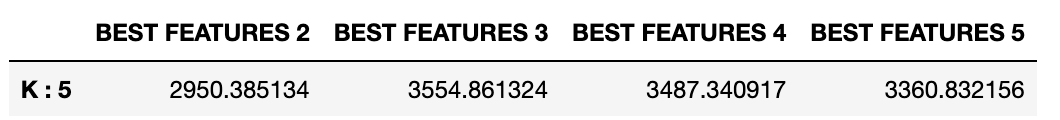
      
      
- We found that multivariate model with top 2 features has lowest rmse values


## MULTIVARIATE MODEL WITH TOP 5 FEATURES AND TUNING HYPERPARAMETER

- After we've expermended with top 5 features and tuned hyperparameter (K = 1-25) we got the result as above(line plot):

- For the model with top 2 features and tuned hyperparameters:
   
        The BEST_FEATURES_2 has minimun : 2730.0395343128075
        The BEST_FEATURES_2 has maximum :4958.60003544437
        The BEST_FEATURES_2 has average : 4081.819667489212
        The BEST_FEATURES_2 has standard deviation : 798.9010461475668

- For the model with top 3 features and tuned hyperparameters:
        
        The BEST_FEATURES_3 has minimun : 3338.6754619884887
        The BEST_FEATURES_3 has maximum :4816.497589011178
        The BEST_FEATURES_3 has average : 4157.079650863482
        The BEST_FEATURES_3 has standard deviation : 489.06750613320526

- For the model with top 4 features and tuned hyperparameters:

        The BEST_FEATURES_4 has minimun : 2971.5274050245407
        The BEST_FEATURES_4 has maximum :4763.535312989311
        The BEST_FEATURES_4 has average : 4115.027258717269
        The BEST_FEATURES_4 has standard deviation : 583.9429698999614
        
- For the model with top 5 features and tuned hyperparameters:

        The BEST_FEATURES_5 has minimun : 2838.5257695773093
        The BEST_FEATURES_5 has maximum :4819.376165846438
        The BEST_FEATURES_5 has average : 4064.848308150759
        The BEST_FEATURES_5 has standard deviation : 624.5962167410146


The model with the top 2 features got the minimum RMSE results more than other models that used feature more than 2 features but if we calculate the average RMSE results from each model we found that the model with the top 5 features got the minimum RMSE instead of the first one.

And if we calculate the standard deviation to inspect the variation from every model we found that the model with the top 3 features has the lowest variance.

We should considering about which model is the optimal model we might really need.